In [164]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [190]:
cec_data = pd.read_csv("CEC_rural_data.csv") #choose out of "CEC_data.csv", "CEC_rural_data.csv", "CEC_urban_data.csv"

#delete irrelevant columns
cec_data = cec_data.drop(['lat','lng','info','name','year','map_name','address_1','address_2','address_3','address_4','cancelled','protocols', 'division_id','internal_id','archive_name','district_name','election_type','internal_name','abroad_district_id','election_numeric_id', 'total_registered_voters_men', 'total_registered_voters_women', 'other_votes'], axis=1)

#sum up the votes for each district by district ID
cec_data_aggregated = cec_data.groupby("district_id").sum() 

cec_data_aggregated 


,total_registered_voters,total_votes,10_votes,12_votes,16_votes,17_votes,20_votes,21_votes,23_votes,25_votes,26_votes,27_votes,3_votes,36_votes,4_votes,41_votes,5_votes,6_votes,8_votes,9_votes
district_id,,,,,,,,,,,,,,,,,,,,
11,46471,24896,179,20,145,26,45,21,13,1106,17,52,34,392,1208,16313,2933,87,645,1660
12,49850,32277,210,22,231,34,71,23,16,1593,15,47,79,491,2604,20094,3007,141,879,2720
13,27949,18085,124,17,79,31,28,17,10,805,11,32,25,307,1134,11319,2000,82,513,1551
14,20352,12588,69,11,50,21,29,12,6,475,7,17,21,210,682,8338,1254,26,354,1006
15,38349,21138,90,10,109,18,32,18,14,744,13,36,54,309,1435,13179,3087,101,337,1552
16,27337,17188,87,14,87,24,34,18,12,741,11,37,35,270,1153,9851,2533,97,642,1542
17,55050,32689,284,22,228,33,47,35,15,1519,17,48,64,653,2676,17932,5084,144,982,2906
18,29486,15603,96,10,87,19,28,11,9,670,10,41,30,300,1575,8778,2260,80,374,1225
19,10797,6521,57,7,35,8,10,2,3,384,5,17,22,136,600,4034,400,25,270,506


In [191]:
# delete the columns with total registered voters and total votes, and change the indexing of the rows
cec_data_votesonly = cec_data_aggregated.drop(['total_registered_voters', 'total_votes'], axis=1)
cec_data_votesonly = cec_data_votesonly.reset_index().drop('district_id', axis=1)

# Tally first digit of each entry 
tally = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}

for i in range(cec_data_votesonly.shape[0]):
    for j in range(cec_data_votesonly.shape[1]):
        entry = cec_data_votesonly.iloc[i,j]
        first_digit = str(int(abs(entry)))[0]
            
        if first_digit in tally:
            tally[first_digit] += 1
            
# Print the tallies
for digit in sorted(tally.keys()):
    print(f"tally{digit}: {tally[digit]}")
    

tally1: 327
tally2: 182
tally3: 109
tally4: 79
tally5: 70
tally6: 75
tally7: 60
tally8: 52
tally9: 51


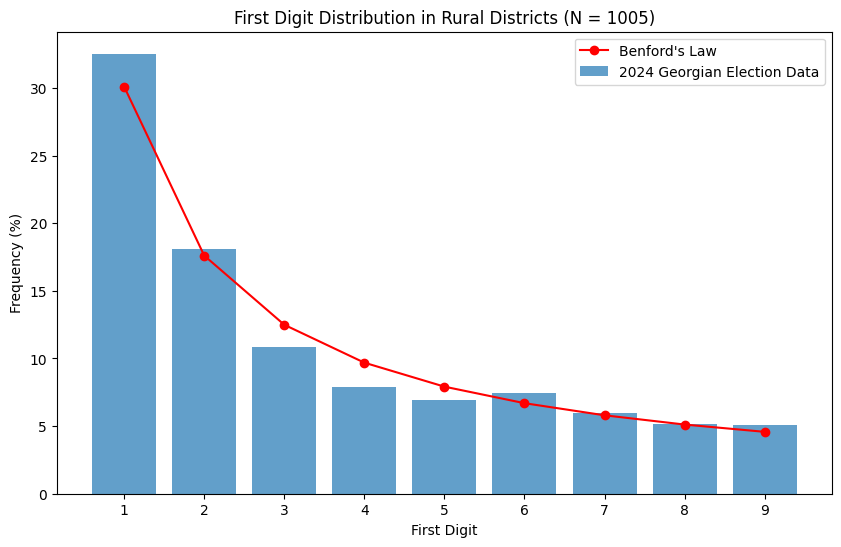

In [192]:
# Calculate total counts
total_count = sum(tally.values())

# Use Benford's Law expected proportions
benford_probs = [np.log10(1 + 1/d) for d in range(1, 10)]
benford_counts = [p * 100  for p in benford_probs]

# Prepare data for plotting
digits = [str(d) for d in range(1, 10)]
observed_counts = [100*tally[str(d)]/total_count for d in range(1, 10)]

# Plot observed vs expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(digits, observed_counts, alpha=0.7, label='2024 Georgian Election Data')
plt.plot(digits, benford_counts, 'ro-', label='Benford\'s Law')
plt.xlabel('First Digit')
plt.ylabel('Frequency (%)')
plt.title('First Digit Distribution in Rural Districts (N = {})'.format(total_count))
plt.legend()
plt.show()


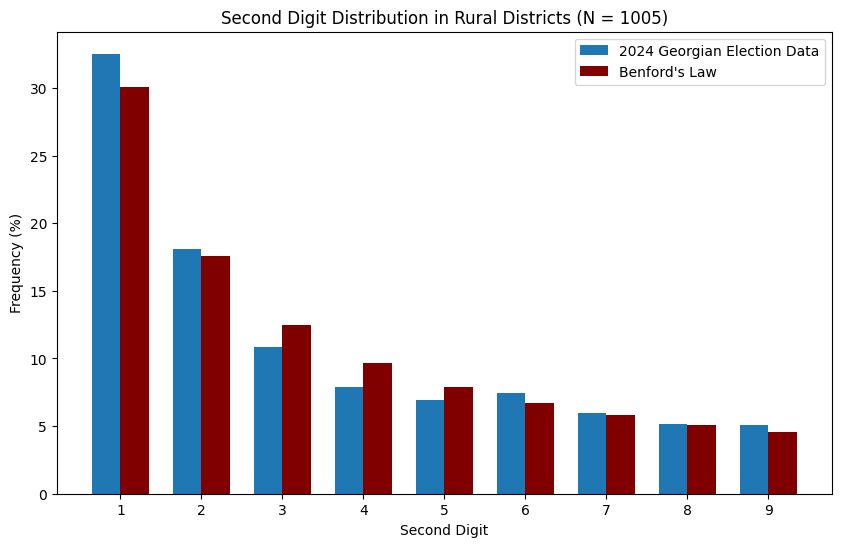

In [193]:
# Define the first digits and the observed and expected counts
digits = np.arange(1, 10)

# Set the width for each bar
bar_width = 0.35

# Set the positions for each bar on the x-axis
r1 = np.arange(len(digits))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot observed counts
plt.bar(r1, observed_counts, width=bar_width, label='2024 Georgian Election Data')

# Plot expected counts
plt.bar(r2, benford_counts, color = 'maroon', width=bar_width, label='Benford\'s Law')

# Add labels and title
plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('Second Digit Distribution in Rural Districts (N = {})'.format(total_count))
plt.xticks([r + bar_width / 2 for r in range(len(digits))], digits)  # Center x-ticks between bars

# Add a legend
plt.legend()

# Show the plot
plt.show()


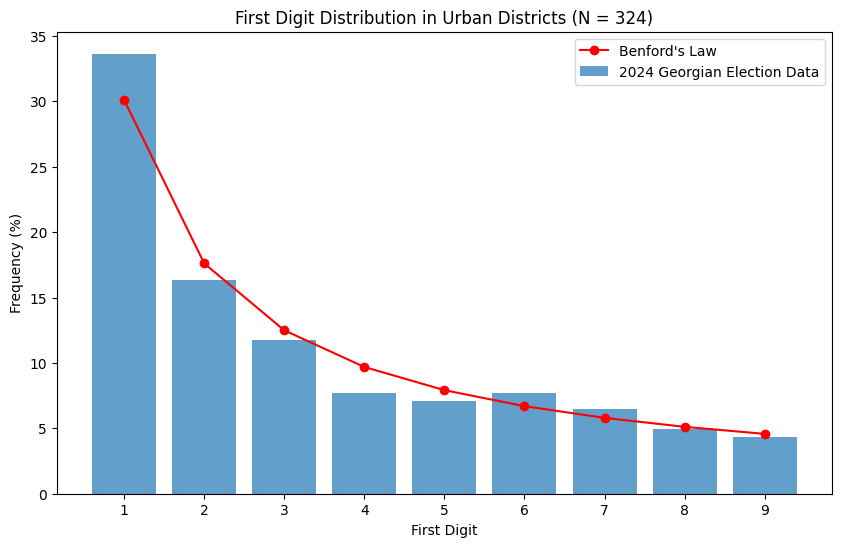

In [188]:
# Calculate total counts
total_count = sum(tally.values())

# Use Benford's Law expected proportions
benford_probs = [np.log10(1 + 1/d) for d in range(1, 10)]
benford_counts = [p * 100  for p in benford_probs]

# Prepare data for plotting
digits = [str(d) for d in range(1, 10)]
observed_counts = [100*tally[str(d)]/total_count for d in range(1, 10)]

# Plot observed vs expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(digits, observed_counts, alpha=0.7, label='2024 Georgian Election Data')
plt.plot(digits, benford_counts, 'ro-', label='Benford\'s Law')
plt.xlabel('First Digit')
plt.ylabel('Frequency (%)')
plt.title('First Digit Distribution in Urban Districts (N = {})'.format(total_count))
plt.legend()
plt.show()


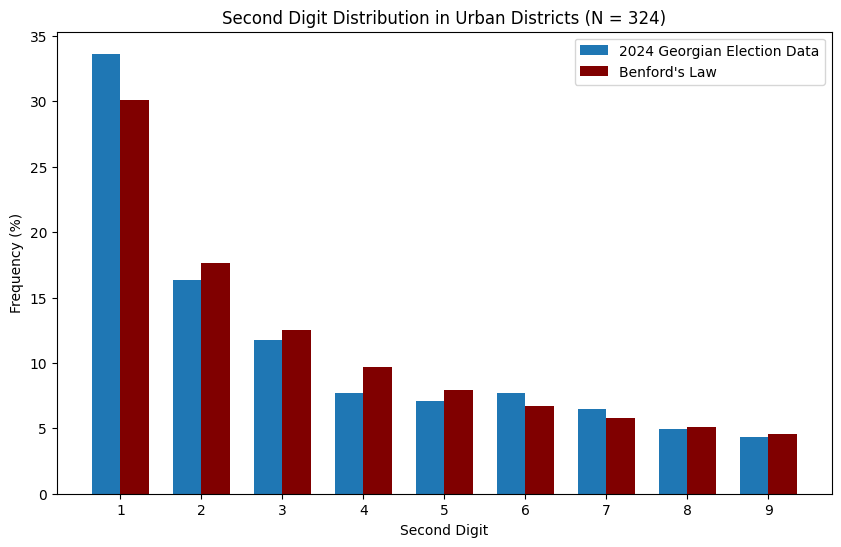

In [189]:
# Define the first digits and the observed and expected counts
digits = np.arange(1, 10)

# Set the width for each bar
bar_width = 0.35

# Set the positions for each bar on the x-axis
r1 = np.arange(len(digits))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot observed counts
plt.bar(r1, observed_counts, width=bar_width, label='2024 Georgian Election Data')

# Plot expected counts
plt.bar(r2, benford_counts, color = 'maroon', width=bar_width, label='Benford\'s Law')

# Add labels and title
plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('Second Digit Distribution in Urban Districts (N = {})'.format(total_count))
plt.xticks([r + bar_width / 2 for r in range(len(digits))], digits)  # Center x-ticks between bars

# Add a legend
plt.legend()

# Show the plot
plt.show()


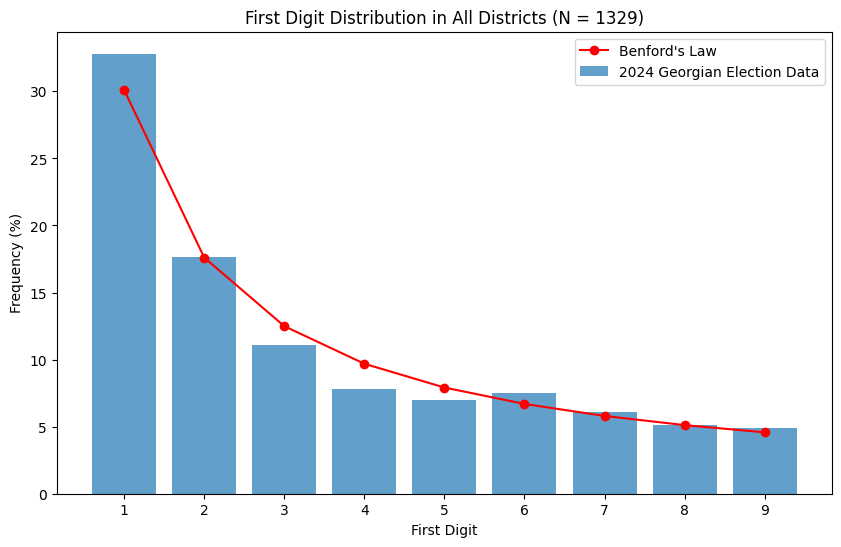

In [182]:
# Calculate total counts
total_count = sum(tally.values())

# Use Benford's Law expected proportions
benford_probs = [np.log10(1 + 1/d) for d in range(1, 10)]
benford_counts = [p * 100  for p in benford_probs]

# Prepare data for plotting
digits = [str(d) for d in range(1, 10)]
observed_counts = [100*tally[str(d)]/total_count for d in range(1, 10)]

# Plot observed vs expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(digits, observed_counts, alpha=0.7, label='2024 Georgian Election Data')
plt.plot(digits, benford_counts, 'ro-', label='Benford\'s Law')
plt.xlabel('First Digit')
plt.ylabel('Frequency (%)')
plt.title('First Digit Distribution in All Districts (N = {})'.format(total_count))
plt.legend()
plt.show()


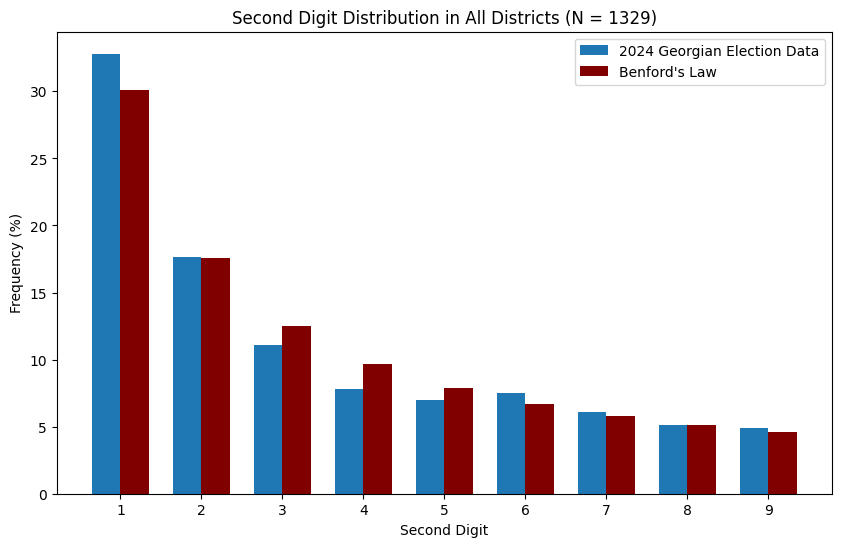

In [183]:
# Define the first digits and the observed and expected counts
digits = np.arange(1, 10)

# Set the width for each bar
bar_width = 0.35

# Set the positions for each bar on the x-axis
r1 = np.arange(len(digits))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot observed counts
plt.bar(r1, observed_counts, width=bar_width, label='2024 Georgian Election Data')

# Plot expected counts
plt.bar(r2, benford_counts, color = 'maroon', width=bar_width, label='Benford\'s Law')

# Add labels and title
plt.xlabel('Second Digit')
plt.ylabel('Frequency (%)')
plt.title('Second Digit Distribution in All Districts (N = {})'.format(total_count))
plt.xticks([r + bar_width / 2 for r in range(len(digits))], digits)  # Center x-ticks between bars

# Add a legend
plt.legend()

# Show the plot
plt.show()
